# Introduction
TBS

## ETL

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

df = pd.read_csv('poland_basic.csv', sep=';')
df['date'] = pd.to_datetime(df['date'])
df['day'] = range(1, len(df) + 1)
df.head()

,date,infected,day
0,2020-03-04,1,1
1,2020-03-05,1,2
2,2020-03-06,5,3
3,2020-03-07,6,4
4,2020-03-08,11,5


## Define prediction function 

In [2]:
def exp_func(x, a, b):
    return a * np.exp(b * x)

def exp_func(x, a, b):
    return a * (b ** x)

In [3]:
wsp = []
for start_day in range(0, len(df)-4):
    df_window = df[start_day:start_day+5]
    popt, pcov = curve_fit(exp_func, df_window['day'], df_window['infected'])
    wsp.append((popt[1] - 1) * 100)

## Plot fitted function

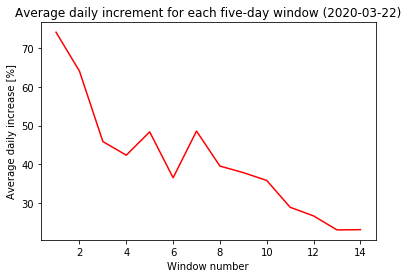

In [4]:
#last day from data source + 1
status_date = np.datetime_as_string(df['date'].tail(1) + pd.DateOffset(1), unit='D')[0]

plt.figure()
plt.plot(range(1, len(wsp) + 1), wsp, 'r-', label="Infected")

plt.title('Average daily increment for each five-day window ({})'.format(status_date))
plt.xlabel('Window number')
plt.ylabel('Average daily increase [%]')

plt.show()